## **Importação das bibliotecas**









In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap


## **Limpeza e criação do DataSet**


In [53]:
dataset = pd.read_csv('vava.csv')


In [54]:
dataset.head()

,Player,Team,Nationality,Kill,Death,K/D,KAST,Prize,Role,HS %,Rounds Played,Rounds Win,Rounds Lose,Rank
0,Sacy,LOUD,Brazil,147,123,1.20,76%,"\t$60,000.00",Initiator,25.50,222,155,67,1
1,saadhak,LOUD,Argentina,150,143,1.05,76%,"\t$60,000.00",Initiator,22.50,222,155,67,1
2,pANcada,LOUD,Brazil,169,137,1.23,81%,"\t$60,000.00",Controller,36.75,222,155,67,1
3,Less,LOUD,Brazil,176,134,1.31,73%,"\t$60,000.00",Sentinel,26.50,222,155,67,1
4,aspas,LOUD,Brazil,166,158,1.05,71%,"\t$60,000.00",Duelist,26.25,222,155,67,1


In [55]:
dataset.dtypes

Player            object
Team              object
Nationality       object
Kill               int64
Death              int64
K/D              float64
KAST              object
Prize             object
Role              object
HS %             float64
Rounds Played      int64
Rounds Win         int64
Rounds Lose        int64
Rank              object
dtype: object

In [56]:
dataset[dataset.isnull()].sum()

Player             0
Team               0
Nationality        0
Kill             0.0
Death            0.0
K/D              0.0
KAST               0
Prize              0
Role               0
HS %             0.0
Rounds Played    0.0
Rounds Win       0.0
Rounds Lose      0.0
Rank               0
dtype: object

In [57]:
df = dataset[['Player', 'Team', 'Nationality', 'Kill', 'Death', 'K/D', 'KAST', 'Prize', 'Role', 'HS %', 'Rounds Played', 'Rounds Win', 'Rounds Lose', 'Rank']]

In [58]:
df.columns = ['Jogador', 'Equipe', 'Nacionalidade', 'Matou', 'Morreu', 'K/D', 'KAST', 'Ganhos', 'Função', 'HS%', 'Rodadas Jogadas', 'Rodadas Vencidas', 'Rodadas Perdidas', 'Rank' ]

In [59]:
df['Função'] = df['Função'].replace({'Initiator': 'Iniciador', 'Sentinel': 'Sentinela', 'Controller': 'Controlador', 'Duelist': 'Duelista', 'Flex': 'Flex'})


In [60]:
df.head()

,Jogador,Equipe,Nacionalidade,Matou,Morreu,K/D,KAST,Ganhos,Função,HS%,Rodadas Jogadas,Rodadas Vencidas,Rodadas Perdidas,Rank
0,Sacy,LOUD,Brazil,147,123,1.20,76%,"\t$60,000.00",Iniciador,25.50,222,155,67,1
1,saadhak,LOUD,Argentina,150,143,1.05,76%,"\t$60,000.00",Iniciador,22.50,222,155,67,1
2,pANcada,LOUD,Brazil,169,137,1.23,81%,"\t$60,000.00",Controlador,36.75,222,155,67,1
3,Less,LOUD,Brazil,176,134,1.31,73%,"\t$60,000.00",Sentinela,26.50,222,155,67,1
4,aspas,LOUD,Brazil,166,158,1.05,71%,"\t$60,000.00",Duelista,26.25,222,155,67,1


## ***Separando os melhores por Função***

In [61]:
df['Pontos'] = df['K/D'] * (df['Rodadas Vencidas'] - df['Rodadas Perdidas'])


In [62]:
melhores_indices = df.groupby('Função')['Pontos'].nlargest(1).index.get_level_values(1)

In [63]:
TopPlayers = df.loc[melhores_indices]


In [64]:
TopPlayers['Jogador e Função'] = TopPlayers['Jogador'] + ' (' + TopPlayers['Função'] + ')'
TopPlayers


,Jogador,Equipe,Nacionalidade,Matou,Morreu,K/D,KAST,Ganhos,Função,HS%,Rodadas Jogadas,Rodadas Vencidas,Rodadas Perdidas,Rank,Pontos,Jogador e Função
2,pANcada,LOUD,Brazil,169,137,1.23,81%,"\t$60,000.00",Controlador,36.75,222,155,67,1,108.24,pANcada (Controlador)
4,aspas,LOUD,Brazil,166,158,1.05,71%,"\t$60,000.00",Duelista,26.25,222,155,67,1,92.40,aspas (Duelista)
18,Shao,FPX,International,130,130,1.00,79%,"\t$16,000.00",Flex,29.75,214,118,96,4,22.00,Shao (Flex)
0,Sacy,LOUD,Brazil,147,123,1.20,76%,"\t$60,000.00",Iniciador,25.50,222,155,67,1,105.60,Sacy (Iniciador)
3,Less,LOUD,Brazil,176,134,1.31,73%,"\t$60,000.00",Sentinela,26.50,222,155,67,1,115.28,Less (Sentinela)


Text(0.5, 1.0, 'Melhores pontuações de cada função')

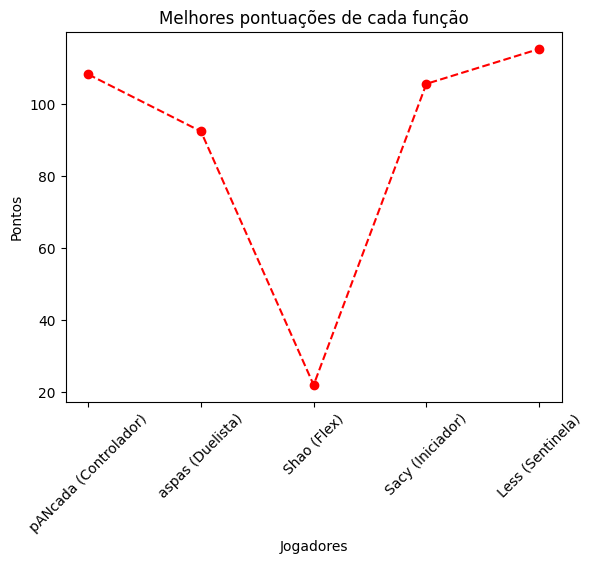

In [65]:
plt.plot(TopPlayers['Jogador e Função'], TopPlayers['Pontos'], color='red', linestyle='--', marker='o')
plt.xlabel('Jogadores', )
plt.xticks(rotation=45)
plt.ylabel('Pontos')
plt.title('Melhores pontuações de cada função')

## **Separando os piores por Função**## 

In [66]:
df['Pontos'] = df['K/D'] * df['Rodadas Vencidas']


In [67]:
piores_indices = df.groupby('Função')['Pontos'].nsmallest(1).index.get_level_values(1)

In [68]:
BottonPlayers = df.loc[piores_indices]


In [69]:
BottonPlayers['Jogador e Função'] = BottonPlayers['Jogador'] + ' (' + BottonPlayers['Função'] + ')'
BottonPlayers

,Jogador,Equipe,Nacionalidade,Matou,Morreu,K/D,KAST,Ganhos,Função,HS%,Rodadas Jogadas,Rodadas Vencidas,Rodadas Perdidas,Rank,Pontos,Jogador e Função
33,dimasick,TL,Kazakhstan,54,74,0.73,67%,"\t$8,000.00",Controlador,38.5,81,42,39,"7,8",30.66,dimasick (Controlador)
32,Scream,TL,Belgium,69,73,0.95,60%,"\t$8,000.00",Duelista,27.0,81,42,39,"7,8",39.90,Scream (Duelista)
30,Nivera,TL,Belgium,60,77,0.78,57%,"\t$8,000.00",Flex,33.5,81,42,39,"7,8",32.76,Nivera (Flex)
39,Shyy,LEV,Chile,39,64,0.61,71%,"\t$8,000.00",Iniciador,22.0,88,35,53,"7,8",21.35,Shyy (Iniciador)
38,Tacolilla,LEV,Chile,51,68,0.75,63%,"\t$8,000.00",Sentinela,24.0,88,35,53,"7,8",26.25,Tacolilla (Sentinela)


Text(0.5, 1.0, 'Piores pontuações de cada função')

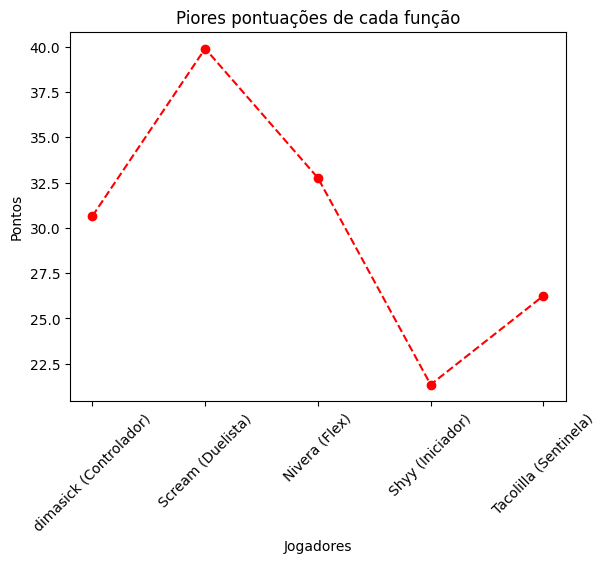

In [70]:
plt.plot(BottonPlayers['Jogador e Função'], BottonPlayers['Pontos'], color='red', linestyle='--', marker='o')
plt.xlabel('Jogadores', )
plt.xticks(rotation=45)
plt.ylabel('Pontos')
plt.title('Piores pontuações de cada função')

## **Comparando desempenho por País** 

In [71]:
# Criar uma coluna com o nome do país de cada equipe
df['Pais'] = df.groupby('Equipe')['Nacionalidade'].transform('first')

In [72]:
# Agrupar por país e equipe, somando os pontos
indice_paises = df.groupby(['Pais', 'Equipe'])['Pontos'].sum()

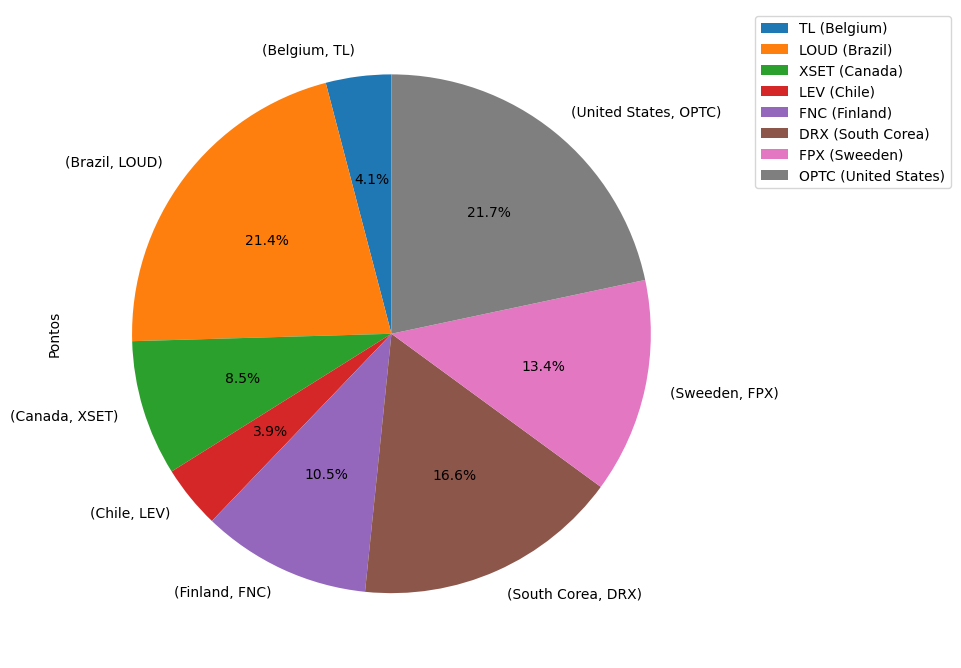

In [73]:
# Gerar gráfico de pizza
plt.figure(figsize=(8, 8))
indice_paises.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.tight_layout()

# Adicionar legenda com o nome do país de cada equipe
legend_labels = [f"{equipe} ({pais})" for pais, equipe in indice_paises.index]
plt.legend(legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

